# Gráficas

Las gráficas son quizas la forma más intuitiva de visualizar ecuaciones, datos, y relaciones entre variables. En este cuaderno, discutiremos como graficar datos en 2D en Python. El material está inspirado en  [este cuaderno](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) de J.R. Johansson.  

Para graficar datos en 2D, debemos cargar el módulo `matplotlib.pyplot`. Una vez hecho esto, podemos graficar datos usando este módulo. Por ejemplo:

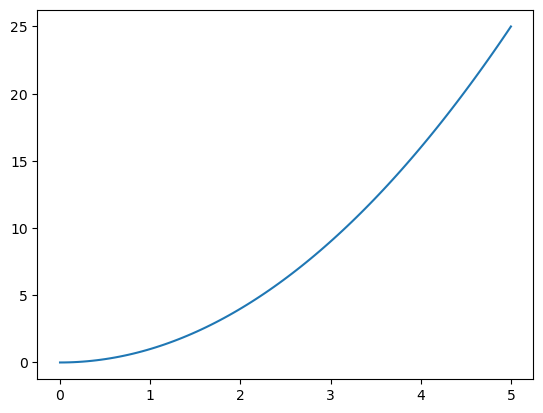

In [1]:
import numpy as np # cargue la librería numpy como np
import matplotlib.pyplot as plt # carge el módulo matplotlib.pyplot como plt

x = np.linspace(0,5,100) # arreglo de 100 números igualmente espaciados entre 0 y 5
plt.plot(x, x**2); # grafique la función cuadrática

En la celda anterior, también cargamos la librería `numpy` para trabajar con arreglos. Usamos el método de numpy `linspace()`, para crear un arreglo de 100 números igualmente espaciados entre 0 y 5. Graficar estos números versus sus valores cuadrados es sencillo, y sólo requiere utilizar el método de pyplot `plot()`, con las coordenadas $x$, $y$ de los puntos de la gráfica.

Note que en el cuaderno de Jupyter, la gráfica aparece automáticamente. Si grafica desde un archivo `.py`, deberá especificar el resultado de la gráfica, salvándola a un archivo, mostrándola, o las dos cosas.

Este es el modo más sencillo de graficar datos en Python. Sin embargo, si queremos tener más control de la gráfica, podemos hacer lo siguiente:

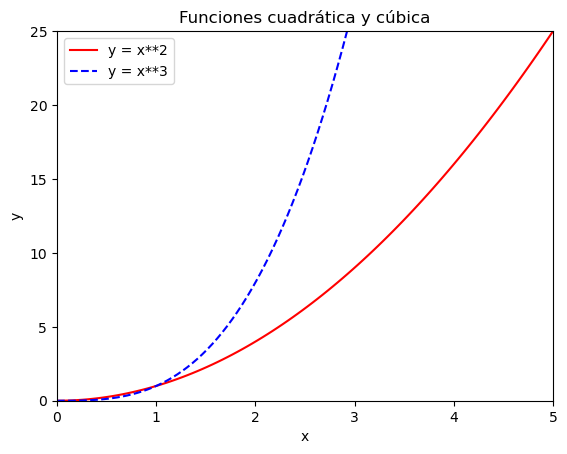

In [2]:
fig, ax = plt.subplots() # figura con 1 gráfica, recupere la figura y los ejes de la gráfica

ax.plot(x, x ** 2, "r-", label="y = x**2") # use los ejes para graficar la función cuadrada
ax.plot(x, x ** 3, "b--", label="y = x**3") # use los ejes para graficar la función cúbica
ax.legend(loc="upper left") # añada una leyenda en la parte superior izquierda
ax.set_xlabel("x") # nombre del eje x
ax.set_ylabel("y") # nombre del eje y
ax.set_xlim([0, 5]) # límites del eje x
ax.set_ylim([0, 25]) # límites del eje y
ax.set_title("Funciones cuadrática y cúbica"); # título de la gráfica

En la celda anterior, el método de pyplot `subplots()` crea una figura con una gráfica; en la misma línea también extraemos los objetos que representan la figura (`fig`) y los ejes de la gráfica (`ax`). En las siguientes líneas podemos enviar métodos al objeto `ax` para construir la gráfica. Utilizamos el objeto `ax` para:

- Graficar las funciones cuadrática y cúbica.
- Añadir una leyenda a la gráfica. El contenido de la leyenda es el especificado en las líneas `ax.plot()` y el argumento `label`.
- Nombrar los ejes de la gráfica.
- Restringir los ejes a límites deseados.
- Añadir un título a la gráfica.

Las strings `r-` y `b--` en las líneas `ax.plot()` permiten definir el color y tipo de la línea: rojo y continua para la función cuadrática, y azul y discontinua para la función cúbica. Los símbolos para los puntos que definen la línea pueden ser especificados de la misma forma. Para obtener más información sobre esto consulte el siguiente [documento](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

Que tal si queremos añadir texto en formato LaTeX en la gráfica? Por ejemplo `\alpha` para producir el símbolo $\alpha$. Para esto podemos usar *raw* strings. Estas strings se denotan con una `r` al principio, por ejemplo `r"\alpha"`. Note también que debemos encapsular el texto LaTeX dentro de símbolos pesos:

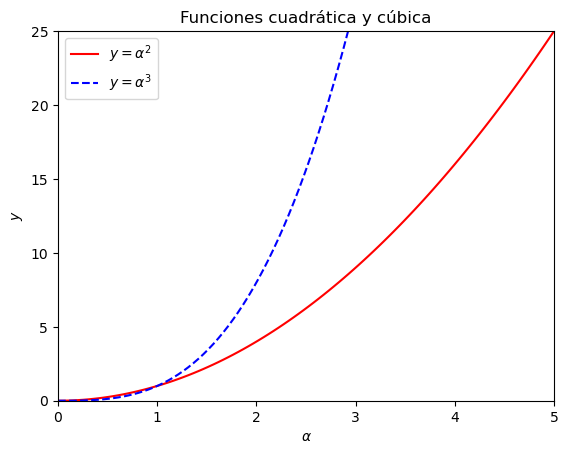

In [3]:
fig, ax = plt.subplots() # figura con 1 gráfica

ax.plot(x, x ** 2, "r-", label=r"$y = \alpha^2$") # use texto raw para incluir símbolos LaTeX
ax.plot(x, x ** 3, "b--", label=r"$y = \alpha^3$") # use texto raw para incluir símbolos LaTeX
ax.set_xlabel(r"$\alpha$") # use texto raw para incluir símbolos LaTeX
ax.set_ylabel(r"$y$") # use texto raw para incluir símbolos LaTeX
ax.legend(loc="upper left") # añada una leyenda en la parte superior izquierda
ax.set_xlim([0, 5]) # límites del eje x
ax.set_ylim([0, 25]) # límites del eje y
ax.set_title("Funciones cuadrática y cúbica"); # título de la gráfica

Esto es más profesional. Que tal si queremos graficar las mismas funciones en una gráfica con escala lineal, y en otra al lado con escala logarítmica? En este caso, debemos incluir en el método `subplots()`, el número de filas (1) y columnas (2) en la figura. También podemos especificar el tamaño de la figura en pulgadas usando el parámetro `figsize`. Cómo en este caso tenemos dos gráficas, el objeto `ax` es un arreglo; `ax[0]` es la gráfica de la izquierda, y `ax[1]` es la gráfica de la derecha. 

En el código siguiente usamos un bucle `for` y el método `zip()`, para iterar sobre las gráficas (`ax`), títulos de las mismas (`titulos`), y límite menor del eje `y`. Note que el eje logarítmico no puede comenzar en 0. Después del bucle, hacemos que el eje `y` tenga escala logarítmica, y en la última líneas el método `tight_layout()` ajusta el espacio entre las gráficas de tal manera que no se sobrepongan:

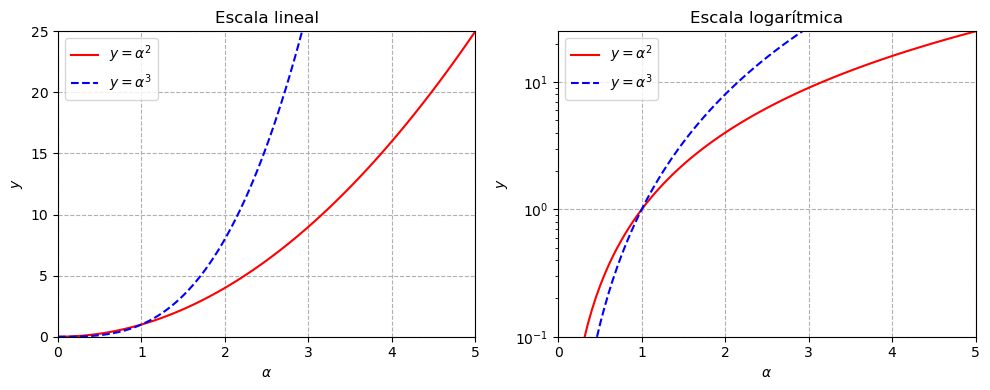

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10,4)) # figura con 1 x 2 gráficas
titulos = ["Escala lineal", "Escala logarítmica"] # lista con títulos de las gráficas
ymins = [0, 0.1] # lista con los límites mínimos del eje y en las dos gráficas

for (i_ax, titulo, ymin) in zip(ax, titulos, ymins): # itere sobre ax, titulos, y ymins 
    i_ax.plot(x, x ** 2, "r-", label=r"$y = \alpha^2$") # grafique la función cuadrática
    i_ax.plot(x, x ** 3, "b--", label=r"$y = \alpha^3$") # grafique la función cúbica
    i_ax.grid(True, linestyle="dashed") # añada una grilla
    i_ax.legend(loc="upper left") # añada una leyenda
    i_ax.set_xlabel(r"$\alpha$") # nombre del eje x
    i_ax.set_ylabel(r"$y$") # nombre del eje y
    i_ax.set_xlim([0, 5]) # límites de x
    i_ax.set_ylim([ymin, 25]) # límites de y
    i_ax.set_title(titulo) # título de la gráfica
         
ax[1].set_yscale("log") # el eje y en la segunda gráfica tiene escala logarítmica
fig.tight_layout(); # añada un espacio conveniente entre las gráficas

Ahora grafiquemos las funciones en escalas lineal y logarítmica en la misma gráfica. Para esto necesitamos dos ejes `y` compartiendo el eje `x` en la misma gráfica. El eje `y` izquierdo tendrá escala lineal, y el derecho escala logarítmica. El método `twinx()` crea un eje gemelo `y` compartiendo el eje `x`:

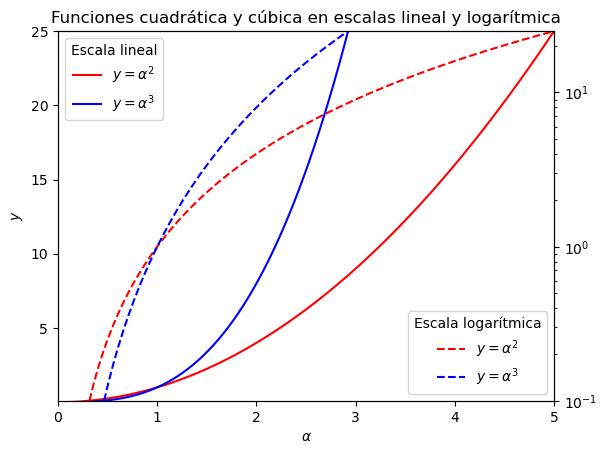

In [5]:
fig, ax = plt.subplots() # figura con 1 gráfica

# escala lineal
ax.plot(x, x ** 2, "r-", label=r"$y = \alpha^2$") # función cuadrática
ax.plot(x, x ** 3, "b-", label=r"$y = \alpha^3$") # función cúbica
ax.set_ylabel(r"$y$") # nombre del eje y
ax.set_ylim([0.1, 25]) # límites del eje y
ax.legend(loc="upper left", title="Escala lineal") # leyenda en la parte superior izquierda

# escala logarítmica
ax1 = ax.twinx() # añada un  nuevo eje y compartiendo el eje x
ax1.plot(x, x ** 2, "r--", label=r"$y = \alpha^2$") # función cuadrática en el nuevo eje
ax1.plot(x, x ** 3, "b--", label=r"$y = \alpha^3$") # función cúbica en el nuevo eje
ax1.set_yscale("log") # eje y tiene escala logarítmica
ax1.set_ylim([0.1, 25]) # límites del eje y, límite inferior no puede ser 0
ax1.legend(loc="lower right", title="Escala logarítmica") # leyenda en la parte inferior derecha

# eje x compartido por los dos ejes y
ax.set_xlabel(r"$\alpha$") # nombre del eje x
ax.set_xlim([0, 5]) # límites del eje x
ax.set_title("Funciones cuadrática y cúbica en escalas lineal y logarítmica"); # titulo de la gráfica

Este ejemplo ilustra una grilla de 2 x 2 gráficas. Aquí usamos el método `text()` para añadir texto a la gráfica en coordenadas `x`, `y` específicas. Para acceder a las gráficas, usamos un bucle `for`. El método de numpy `ravel()` convierte en una dimensión ("flattens") el arreglo de gráficas `ax`. Esto nos permite iterar sobre el mismo en el bucle. El método `enumerate()` nos permite obtener al mismo tiempo el número de la iteración (`i`), y los ejes de la gráfica (`i_ax`):

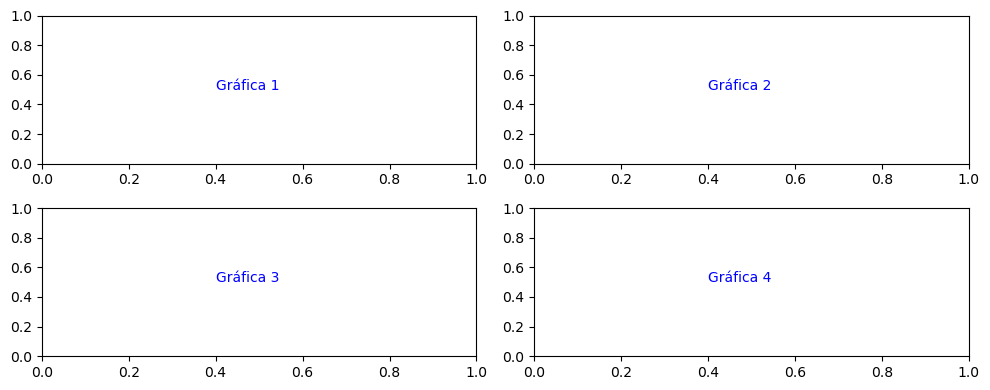

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10,4)) # figura con 2 x 2 gráficas

for i, i_ax in enumerate(ax.ravel()): # itere sobre las gráficas y obtenga el índice de la iteración
    i_ax.text(0.4, 0.5, f"Gráfica {i+1}", color = "blue") # escriba un texto en la mitad de la gráfica

fig.tight_layout(); # añada un espacio conveniente entre las gráficas

La filosofía orientada a objetos del módulo `pyplot` es muy versatil. Podemos controlar cada elemento de la gráfica. Este es un ejemplo que añade un recuadro a la gráfica, de tal mánera que podamos observar con más detalle las funciones cuadrática y cúbica cerca del origen. Note que sobre la figura (`fig`) usamos el método `add_axes()` para añadir los ejes del recuadro:

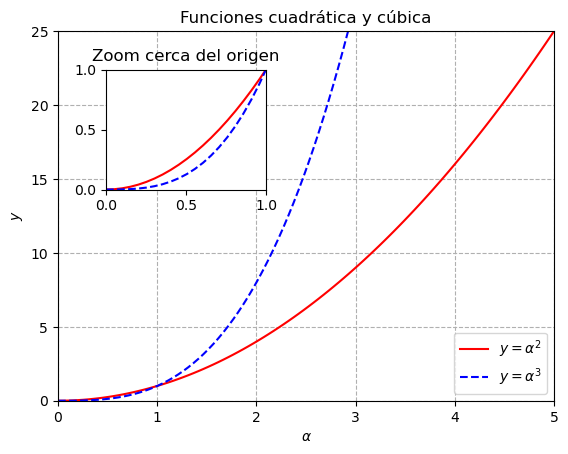

In [7]:
fig, ax = plt.subplots() # 1 gráfica

ax.plot(x, x ** 2, "r-", label=r"$y = \alpha^2$") # función cuadrática
ax.plot(x, x ** 3, "b--", label=r"$y = \alpha^3$") # función cúbica
ax.grid(True, linestyle="dashed") # añada una grilla
ax.legend(loc="lower right") # leyenda
ax.set_xlabel(r"$\alpha$") # nombre de eje x
ax.set_ylabel(r"$y$") # nombre de eje y
ax.set_xlim([0, 5]) # límites de eje x
ax.set_ylim([0, 25]) # límites de eje y
ax.set_title("Funciones cuadrática y cúbica"); # título de la gráfica

# para construir el recuadro, añada un nuevo par de ejes
inset_ax = fig.add_axes([0.2, 0.55, 0.25, 0.25]) # x, y, ancho, y altura del recuadro
inset_ax.plot(x, x ** 2, "r-") # función cuadrática en el recuadro
inset_ax.plot(x, x ** 3, "b--") # función cúbica en el recuadro
inset_ax.set_xlim([0, 1]) # límites del eje x en el recuadro
inset_ax.set_ylim([0, 1]) # límites del eje y en el recuadro
inset_ax.set_xticks([0, 0.5, 1.0]) # divisiones del eje x
inset_ax.set_yticks([0.0, 0.5, 1.0]) # divisiones del eje y
inset_ax.set_title("Zoom cerca del origen"); # título del recuadro

Para archivar la gráfica como una imagen (e.g., png, pdf, svg, etc.) a una resolución deseada, podemos usar el método `savefig()` sobre la figura:

In [8]:
fig.savefig("mi_grafica.png", dpi=200) # archive la gráfica como una imagen png con resolución 200 dpi

Además del método `plot()`, pyplot tiene otros métodos para realizar otros tipos de gráficas. [Esta página](https://matplotlib.org/gallery.html) contiene una lista de los tipos de gráficas disponibles. El código siguiente incluye algunos ejemplos:

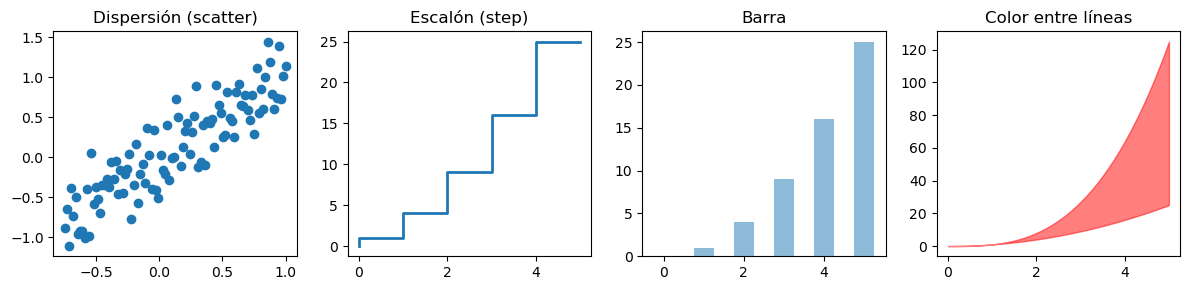

In [9]:
xx = np.linspace(-0.75, 1., 100) # arreglo de 100 números igualmente espaciados entre -0.75 y 1.0
n = np.array([0,1,2,3,4,5]) # otro areglo

fig, ax = plt.subplots(1, 4, figsize=(12,3)) # figura con 1 x 4 gráficas

ax[0].scatter(xx, xx + 0.25*np.random.randn(len(xx))) # gráfica de dispersión (scatter)
ax[0].set_title("Dispersión (scatter)") # título de la gráfica

ax[1].step(n, n**2, lw=2) # gráfica de escalones
ax[1].set_title("Escalón (step)")  # título de la gráfica

ax[2].bar(n, n**2, align="center", width=0.5, alpha=0.5) # gráfica barra
ax[2].set_title("Barra")  # título de la gráfica

ax[3].fill_between(x, x**2, x**3, color="red", alpha=0.5); # gráfica con color entre líneas
ax[3].set_title("Color entre líneas")  # título de la gráfica

fig.tight_layout(); # añada un espacio conveniente entre las gráficas

Más tarde miraremos algunas de estas gráficas. Ahora que sabemos como graficar, hagamos un ejercicio más geológico:

## Ejercicio 1

En geología, es una practica común dibujar cortes geológicos con la escala vertical más grande que la escala horizontal, de esta forma estirando el corte verticalmente sin modificar la dimensión horizontal. El grado de estiramiento de la sección en la vertical es conocido como la exageración vertical $V$. Este parámetro afecta el buzamiento y espesor de capas en el corte, de acuerdo a las siguientes fórmulas:

### <div align="center">$\tan\delta'=V\tan\delta$</div>

## <div align="center">$\frac{t'}{t}=\frac{\sin\delta'}{\sin\delta}$</div>

donde $\delta'$ y $t'$ son el buzamiento y espesor exagerado, respectivamente.

1. Construya una gráfica de buzamiento real versus buzamiento exagerado para valores $V$ = 0.5, 1, 2, 3, 4, 6 y 10.

2. Construya una gráfica de buzamiento real versus la fracción $t'/t$ para valores $V$ = 0.5, 1, 2, 3, 4, 6 y 10.

Las gráficas 1 y 2 deben ser construidas una al lado de la otra. El siguiente código construye las gráficas:

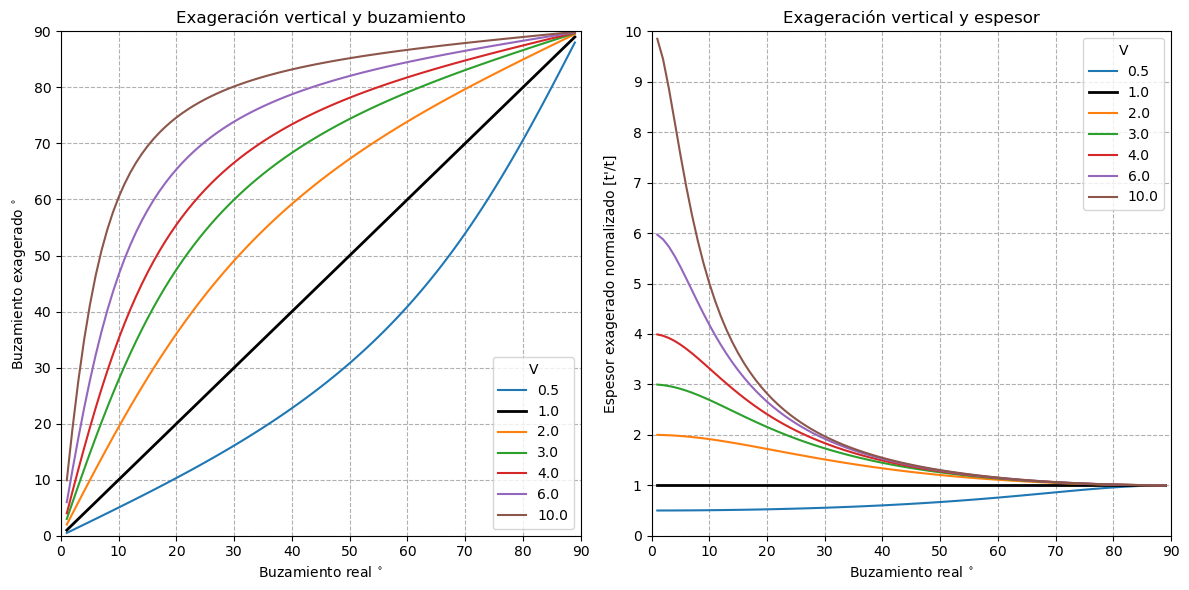

In [10]:
buz = np.arange(1, 90, 1) # buzamientos en grados, evite comenzar en 0 o terminar en 90 grados
buz_rad = np.radians(buz) # buzamientos en radianes
V = [0.5, 1.0, 2.0, 3.0, 4.0, 6.0, 10.0] # valores de exageración vertical

fig, ax = plt.subplots(1,2,figsize=(12,6)) # figura con 1 x 2 gráficas

for v in V: # itere sobre los valores de exageración vertical
    # calcule buzamiento exagerado y espesor exagerado normalizado
    buz_ex_rad = np.arctan(v * np.tan(buz_rad)) # buzamientos exagerados en radianes
    buz_ex = np.degrees(buz_ex_rad) # buzamientos exagerados en grados
    t_ex = np.sin(buz_ex_rad) / np.sin(buz_rad) # espesores exagerados normalizados
    # grafique estos datos
    if v == 1.0: # si la exageración vertical es 1.0, haga una línea negra más gruesa
        ax[0].plot(buz, buz_ex, color="black", linewidth=2.0, label=str(v))
        ax[1].plot(buz, t_ex, color="black", linewidth=2.0, label=str(v))
    else: # sino, dibuje una línea de color más delgada
        ax[0].plot(buz, buz_ex, label=str(v))
        ax[1].plot(buz, t_ex, label=str(v))
    
# grafica izquierda
ax[0].set_xlabel(r"Buzamiento real $^{\circ}$") # nombre de eje x
ax[0].set_ylabel(r"Buzamiento exagerado $^{\circ}$") # nombre de eje y
ax[0].set_xlim([0, 90]) # límites de eje x
ax[0].set_ylim([0, 90]) # límites de eje y
ax[0].grid(True, linestyle="dashed") # añada una grilla
ax[0].legend(title="V") # título de la leyenda
ax[0].set_title("Exageración vertical y buzamiento")

# grafica derecha
ax[1].set_xlabel(r"Buzamiento real $^{\circ}$") # nombre de eje x
ax[1].set_ylabel(r"Espesor exagerado normalizado [t'/t]") # nombre de eje y
ax[1].set_xlim([0, 90]) # límites de eje x
ax[1].set_ylim([0, 10]) # límites de eje y
ax[1].set_yticks(np.arange(0,11,1)) # divisiones en el eje y
ax[1].grid(True, linestyle="dashed") # añada una grilla
ax[1].legend(title="V") # título de la leyenda
ax[1].set_title("Exageración vertical y espesor")

fig.tight_layout() # añada un espacio conveniente entre las gráficas

El efecto de la exageración vertical es mayor en buzamientos bajos. Así la exageración vertical resalta la diferencia en buzamiento entre rasgos de buzamiento bajo, pero enmascara la diferencia en buzamiento entre rasgos de buzamiento alto. V es buena para resaltar relaciones estratigráficas de bajo ángulo (e.g., estratificación y discordancias), pero no es buena para visualizar fallas de alto ángulo.

En términos de espesor, V aumenta el espesor de capas de bajo buzamiento más que el espesor de capas de alto buzamiento. Así en una sección con V > 1.0, los flancos de un pliegue se ven adelgazados con respecto a las capas de menor buzamiento de la charnela. Un pliegue paralelo, puede verse como un pliegue de espesor variable!

## Ejercicio 2

El archivo `source_error.dat` en el directorio de `datos` muestra los valores estimados y sus intervalos de confianza (5-95%) del momento sísmico ($M_0$) y la frecuencia de esquina ($f_c$) para una serie de terremotos (Prieto et al., 2007).

Haga una figura de $M0$ vs $f_c$, incluyendo sus barras de error. Tenga en cuenta lo siguiente:

- Para la gráfica de barras de error, se debe indicar la longitud de la barra de error, no el intervalo.
- Las gráficas deben estar en escala logarítmica en ambos ejes
- Marque los ejes y ponga una grilla.

pyplot tiene el siguiente método para generar figuras de barras de error: 

```
plt.errorbar(x, y,xerr=x_err, yerr=y_err)
```
en la cual se gráfica $x$ y $y$, con sus respectivas barras de error `xerr` y `yerr`. Note que `errorbar` requiere la longitud de la barra de error, no el límite máximo o mínimo. 

En el ejemplo, las barras de error son asimétricas, por lo que el arreglo `xerr` tiene dimensiones `(2,N)` para describir la extensión de la barra de error inferior y superior. Si la barra es simétrica `xerr` puede ser un arreglo `(N)` y si todas las barras son de igual longitud para todos los puntos, `xerr` puede ser una constante. 

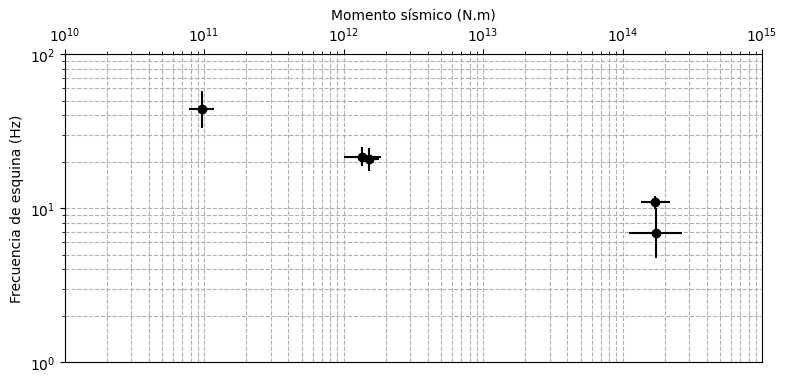

In [11]:
import os # esto es para leer los datos

# Cargar datos
fname = os.path.join("datos", "source_error.dat")
data = np.loadtxt(fname,skiprows=1)
M0      = data[:,2]
M0_ci   = data[:,3:5].T
fc      = data[:,5]
fc_ci   = data[:,6:8].T

# Longitud de barras de error
M0_bar  = np.abs(M0_ci-M0) 
fc_bar  = np.abs(fc_ci-fc) 

# La figura
fig, ax = plt.subplots(figsize=(9,4))
ax.errorbar(M0, fc,xerr=M0_bar, yerr=fc_bar,fmt='ko')
ax.set_ylim([1 , 100])
ax.set_xlim(1e10, 1e15)
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(which="both",linestyle="--")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.set_xlabel("Momento sísmico (N.m)");
ax.set_ylabel("Frecuencia de esquina (Hz)")

# guarde la figura como un jpeg 
fig.savefig("Mo_vs_fc.jpg", dpi=300)